# Lab Experiment 1: Sampling and quantization of audio signals.

#### Q.1 With the help of Python code, show the generation of a signal of the following types:
1. An Exponential Signal whose amplitude decreases as time increases
2. A Sinusoidal Signal (Sine Wave) of a specific frequency

#### Q.2 Plot the above-mentioned signals.

#### Q.3 Show the sampling points for the above-mentioned signals.

#### Q.4 Perform quantization.

#### Q.5 Plot the quantized signals.

In [1]:
# Importing Required Libraries after setting them in venv
import numpy as np
import matplotlib.pyplot as plt

**Q.1 Generating Signals:**

For an exponential signal whose amplitude decreases as time increases, let's say we have an equation like `x(t) = A * e^(-alpha * t)`, where `A` is the amplitude and `alpha` is a decay constant.  
For a sinusoidal signal, the equation is `x(t) = A * sin(2 * pi * f * t)`, where `A` is the amplitude and `f` is the frequency.

In [2]:
# Parameters for exponential signal
a = 1.0                # Initial amplitude
decay_factor = 0.5     # Decay factor, controls how fast the signal decreases
signal_duration = 6    # Duration of the signal in seconds
sampling_rate = 15

# Time values for the signal
time = np.arange(0, signal_duration, 1/sampling_rate)
#time = np.linspace(0, signal_duration, int(signal_duration * sampling_rate))

# Generate the exponential signal
exponential_signal = a * np.exp(-decay_factor * time)

In [3]:
# Parameters for sinusoidal signal
A = 1.0             # Amplitude of the sinusoidal wave
f = 1               # Frequency in Hz
num_samples = 1000  # Number of samples
sine_duration = 5   # Duration of the signal in seconds
# Generate time values for the sinusoidal signal
time_sin = np.linspace(0, sine_duration, num_samples)
# Generate the sinusoidal signal
sinusoidal_signal = A * np.sin(2 * np.pi * f * time_sin)

**Q.2 Plotting the above generated Signals:**

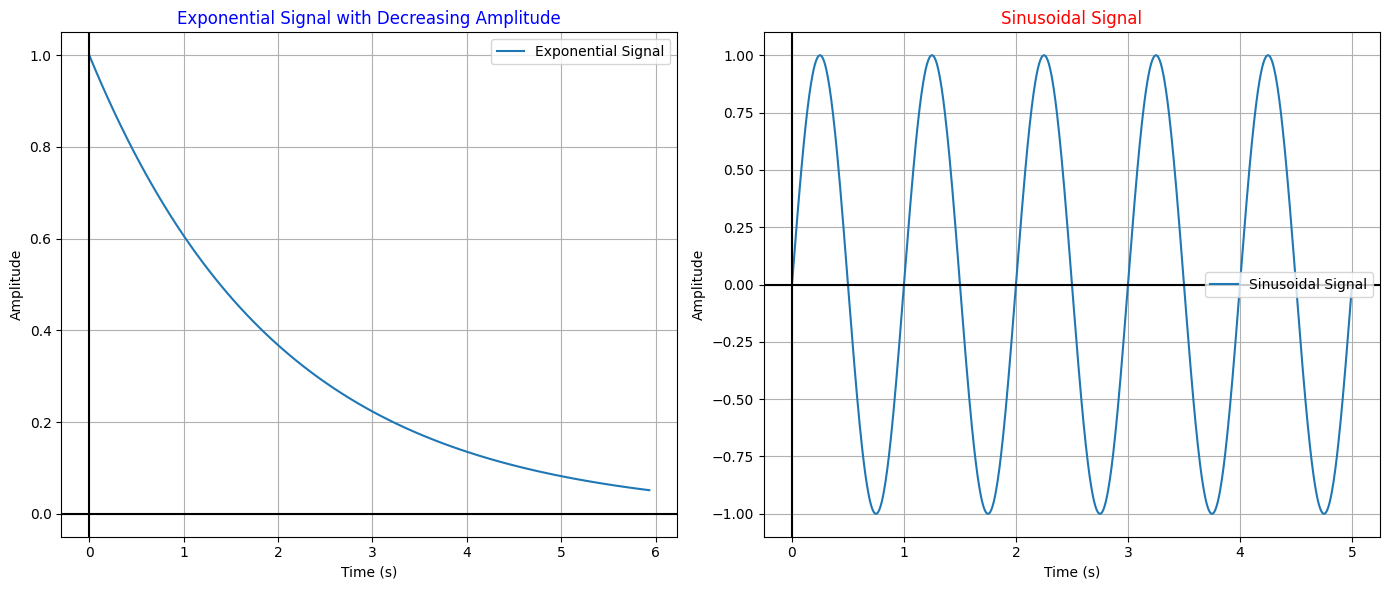

In [4]:
# Plotting side by side
plt.figure(figsize=(14, 6))

# Exponential Signal
# Create a subplot arrangement with 1 row and 2 columns and plot for 1st (left) column
plt.subplot(1, 2, 1)# Plotting time vs amplitude for exponential signal
plt.plot(time, exponential_signal, label='Exponential Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Exponential Signal with Decreasing Amplitude', color='b')
plt.grid(True)
plt.legend()

# Sinusoidal Signal
# Create a subplot arrangement with 1 row and 2 columns and plot for 2nd (right) column
plt.subplot(1, 2, 2)
plt.plot(time_sin, sinusoidal_signal, label='Sinusoidal Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Sinusoidal Signal', color='r')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Q.3 Show the sampling points for the above-mentioned signals.**.

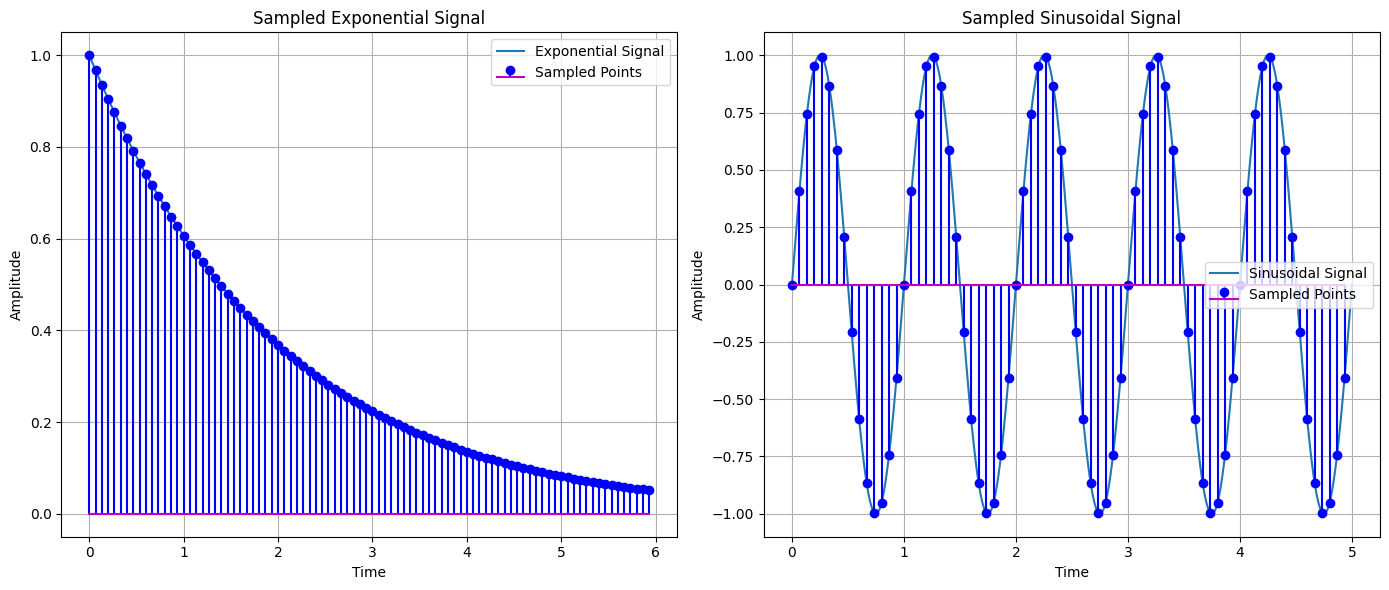

In [5]:
# Sampling 
# Generate time values for the sampled exponential and sinusoidal signal
t_sampled = np.arange(0, signal_duration, 1/sampling_rate)
t_sampled_sin = np.arange(0, sine_duration, 1/sampling_rate)
# Generate sampled exponential and sinusoidal signal 
exp_signal_sampled = a * np.exp(-decay_factor * t_sampled)
sin_signal_sampled = A * np.sin(2 * np.pi * f * t_sampled_sin)

# Plotting
plt.figure(figsize=(14, 6))

# Left subplot for sampled exponential signal
plt.subplot(1, 2, 1)
plt.plot(time, exponential_signal, label='Exponential Signal')
plt.stem(t_sampled, exp_signal_sampled, 'b', markerfmt='bo', basefmt="m", linefmt='b', label='Sampled Points')
plt.title('Sampled Exponential Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Right subplot for sampled sinusoidal signal
plt.subplot(1, 2, 2)
plt.plot(time_sin, sinusoidal_signal, label='Sinusoidal Signal')
plt.stem(t_sampled_sin, sin_signal_sampled, 'b', markerfmt='bo', basefmt="m", linefmt='b', label='Sampled Points')
plt.title('Sampled Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Q.4 Perform quantization.**.

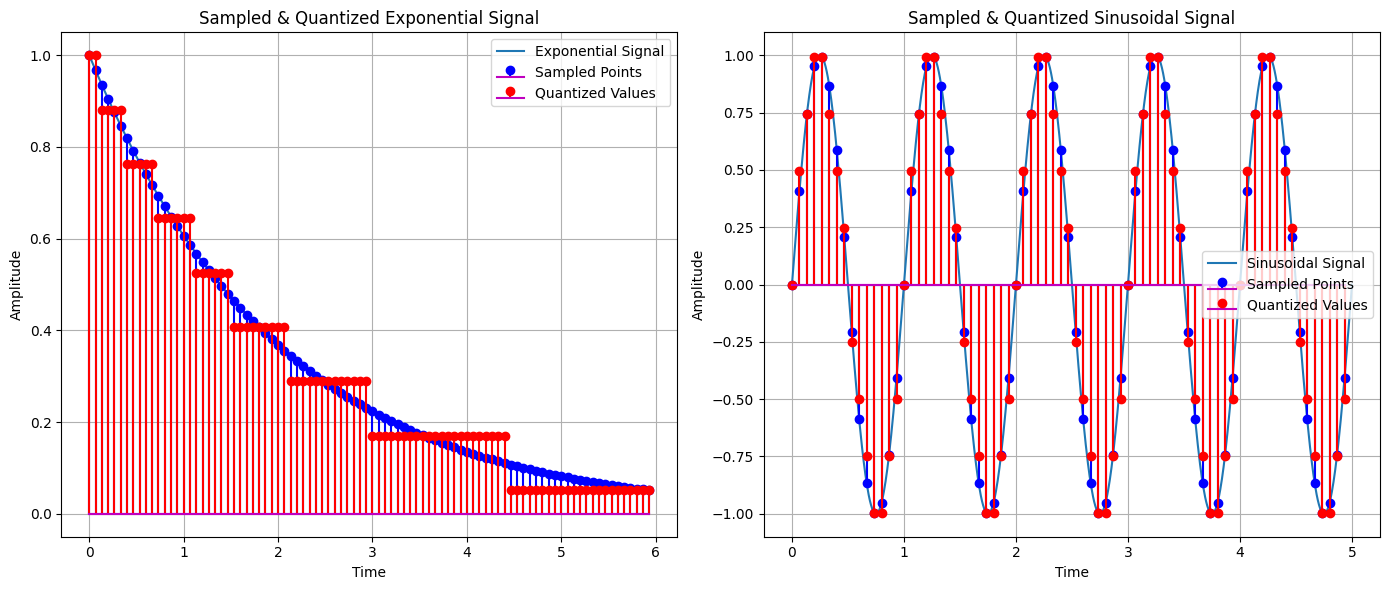

In [6]:
# Function to quantize a signal to a specified number of levels
def quantize(signal, levels):
    max_amplitude = np.max(signal)
    min_amplitude = np.min(signal)
    step_size = (max_amplitude - min_amplitude) / levels
    # Apply quantization: round the scaled signal to the nearest step and then scale back
    quantized_signal = np.round((signal - min_amplitude) / step_size) * step_size + min_amplitude
    return quantized_signal

# Input the number of quantization bits
bits = int(input("Enter the number of quantization bits: ")) 
levels = 2 ** bits

# Quantize the sampled exponential and sinusoidal signals
quantized_exp_signal = quantize(exp_signal_sampled, levels)
quantized_sin_signal = quantize(sin_signal_sampled, levels)

# Plotting
plt.figure(figsize=(14, 6))

# Left subplot for sampled and quantized exponential signal
plt.subplot(1, 2, 1)
plt.plot(time, exponential_signal, label='Exponential Signal')
plt.stem(t_sampled, exp_signal_sampled, 'b', markerfmt='bo', basefmt="m", linefmt='b', label='Sampled Points')
plt.stem(t_sampled, quantized_exp_signal, 'r', markerfmt='ro', basefmt="m", linefmt='r', label='Quantized Values')
plt.title('Sampled & Quantized Exponential Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Right subplot for sampled and quantized  signal
plt.subplot(1, 2, 2)
plt.plot(time_sin, sinusoidal_signal, label='Sinusoidal Signal')
plt.stem(t_sampled_sin, sin_signal_sampled, 'b', markerfmt='bo', basefmt="m", linefmt='b', label='Sampled Points')
plt.stem(t_sampled_sin, quantized_sin_signal, 'r', markerfmt='ro', basefmt="m", linefmt='r', label='Quantized Values')
plt.title('Sampled & Quantized Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Q.5 Plot the quantized signals.**

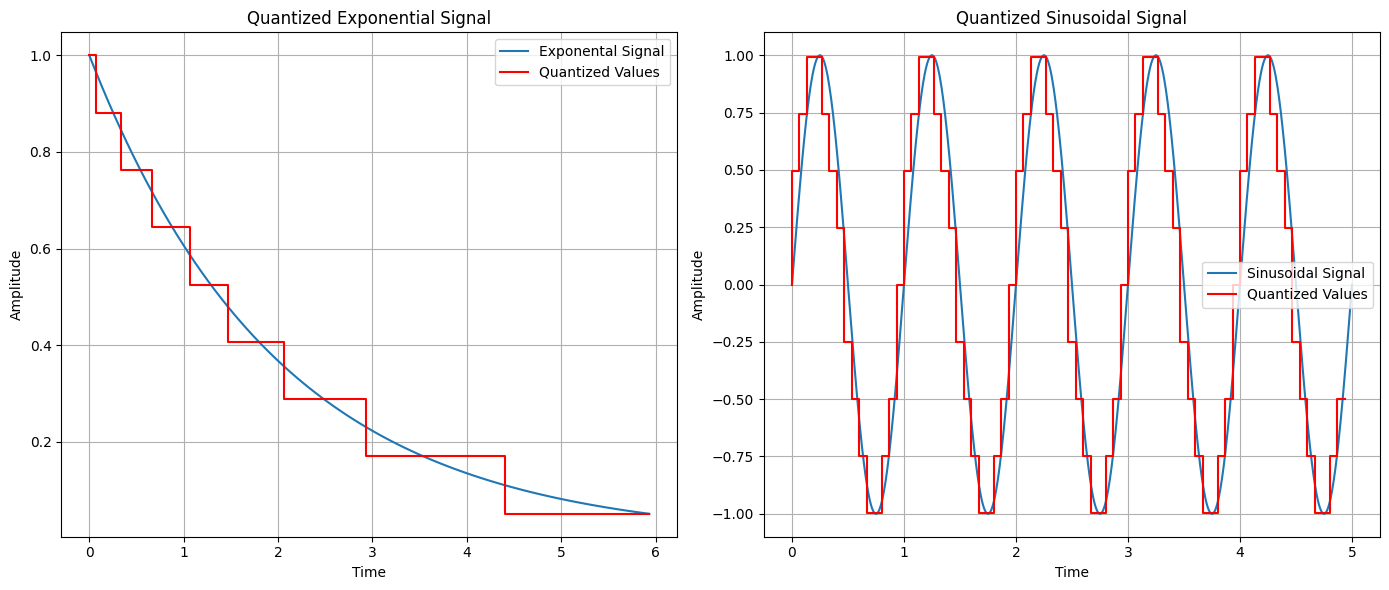

In [7]:
plt.figure(figsize=(14, 6)) 
# Left subplot for quantized exponential signal
plt.subplot(1, 2, 1) 
plt.plot(time, exponential_signal, label='Exponental Signal') 
# Plot quantized exponential signal using step function
plt.step(t_sampled, quantized_exp_signal, 'r', label='Quantized Values')
plt.title('Quantized Exponential Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude') 
plt.grid(True) 
plt.legend() 

# Right subplot for quantized sinusoidal signal
plt.subplot(1, 2, 2) 
plt.plot(time_sin, sinusoidal_signal, label='Sinusoidal Signal') 
# Plot quantized sinusoidal signal using step function
plt.step(t_sampled_sin, quantized_sin_signal, 'r', label='Quantized Values')
plt.title('Quantized Sinusoidal Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude') 
plt.grid(True) 
plt.legend() 

plt.tight_layout()
plt.show()